# In this, we see about Transformations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings. simplefilter(action='ignore', category=Warning) 

### why we need Transformation?

For Linear Regression, Gradient Descent & for Global minima, it used

Algorithm like KNN, K means, Hieracial clustering --- impact on Euclidean distance 

D.L techniques like CNN, ANN and RNN

In [2]:
data = pd.read_csv("F:/files/wine.csv")

In [3]:
data.head(5)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## First analyze the dataset given

In [4]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Before Scaling The variable, apply some transformation for better result

# Logerthemic Transformation

In [5]:
df = data.copy()

In [6]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [7]:
df = df[['Alcohol', 'Proline', 'Alcalinity']]

In [8]:
def plot_Before_logerthemic(df,var):
    plt.figure(figsize = (10,4))
    
    val = np.random.randint(100000,999999)
    col = "#" + str(val)

    sns.distplot(df[var], color = col, label = var)
    plt.legend()

    plt.plot()

In [9]:
for i in df.columns:
    print(i, ":", df[i].std())

Alcohol : 0.8118265380058577
Proline : 314.9074742768489
Alcalinity : 3.3395637671735052


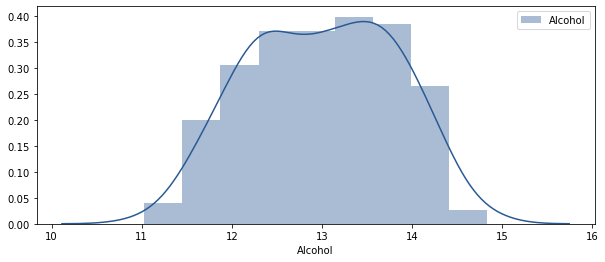

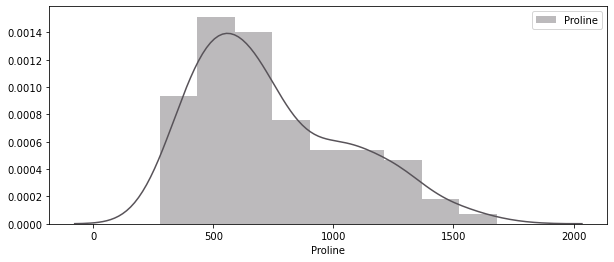

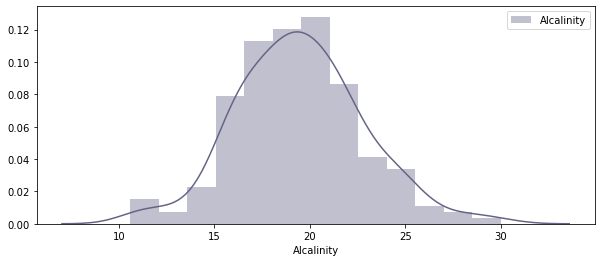

In [10]:
for i in df.columns:
    plot_Before_logerthemic(df,i)

In [11]:
df = np.log(df)

In [12]:
for i in df.columns:
    print(i, ":", df[i].std())

Alcohol : 0.06275446025866888
Proline : 0.4151068078439815
Alcalinity : 0.17577323168453257


In [13]:
def plot_After_logerthemic(df,var):
    plt.figure(figsize = (10,4))
    
    val = np.random.randint(100000,999999)
    col = "#" + str(val)

    sns.distplot(df[var], color = col, label = var)
    plt.legend()

    plt.plot()

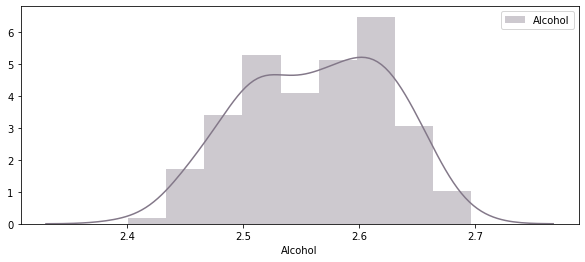

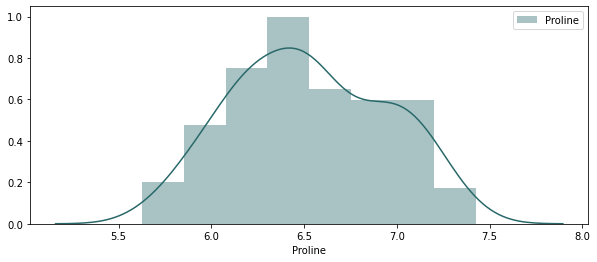

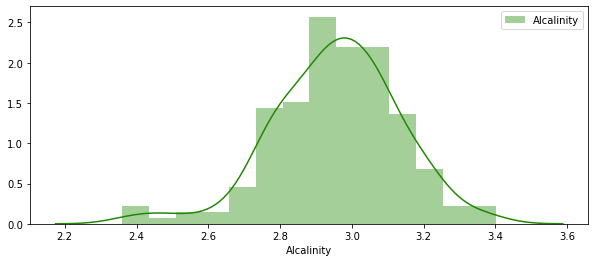

In [14]:
for i in df.columns:
    plot_After_logerthemic(df,i)

#Comparing Before and after Logerthemic Transformation, values become normalized and follows the bell curve transformation
#for this, model will read the variables easily, and prediction accuracy become high

# Applying all Exponential, reciprocal, and square root transformation

In [15]:
df = data.copy()

In [16]:
df = df[['Proline']]

In [17]:
def Trans(df,var):
    df[var + "_Reci_trans"] = 1/(df[var]+1)
    df[var + "_SquareRt_trans"] = df[var] ** (1/2)
    df[var + "_Exp_trans"] = np.exp(df[var])
    df[var + "BoxCox"], param = stats.boxcox(df[var]+1) 

In [18]:
Trans(df,'Proline')

In [19]:
df

,Proline,Proline_Reci_trans,Proline_SquareRt_trans,Proline_Exp_trans,ProlineBoxCox
0,1065,0.000938,32.634338,inf,4.946313
1,1050,0.000951,32.403703,inf,4.939484
2,1185,0.000843,34.423829,inf,4.997397
3,1480,0.000675,38.470768,inf,5.101955
4,735,0.001359,27.110883,inf,4.764417
...,...,...,...,...,...
173,740,0.001350,27.202941,inf,4.767805
174,750,0.001332,27.386128,inf,4.774506
175,835,0.001196,28.896367,inf,4.827772
176,840,0.001189,28.982753,inf,4.830716


In [20]:
for i in df.columns:
    print(i, ":", df[i].std())

Proline : 314.9074742768489
Proline_Reci_trans : 0.000646252776273396
Proline_SquareRt_trans : 5.600841225382396
Proline_Exp_trans : nan
ProlineBoxCox : 0.20881303434207193


In [21]:
def plot_Trans(df,var):
    plt.figure(figsize = (10,4))
    
    val = np.random.randint(100000,999999)
    col = "#" + str(val)

    sns.distplot(df[var], color = col, label = var)
    plt.legend()

    plt.plot()

In [22]:
### Because of Proline_Exp_trans has inf values, ignore them

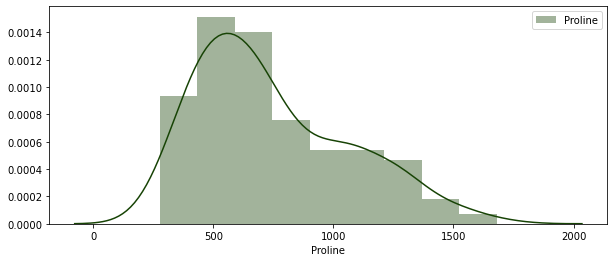

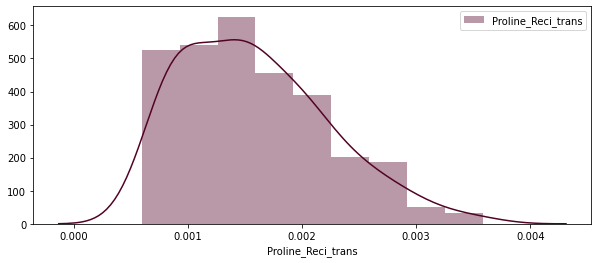

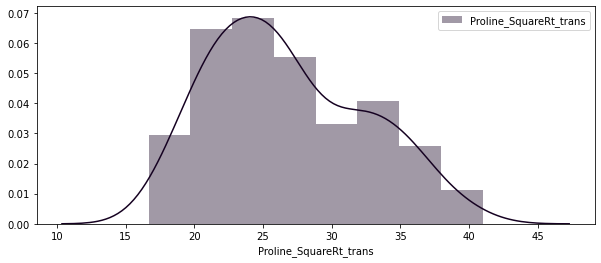

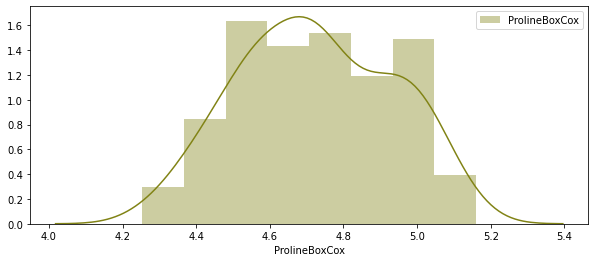

In [23]:
for i in df.columns:
    if i == 'Proline_Exp_trans': 
        continue
    plot_Trans(df,i)

# from all above boxcox plays a role in this variable...


# Normalization

In [24]:
df = data.copy()

In [25]:
df = df[['Alcohol', 'Malic', 'Hue', 'Nonflavanoids']]

In [26]:
df

,Alcohol,Malic,Hue,Nonflavanoids
0,14.23,1.71,1.04,0.28
1,13.20,1.78,1.05,0.26
2,13.16,2.36,1.03,0.30
3,14.37,1.95,0.86,0.24
4,13.24,2.59,1.04,0.39
...,...,...,...,...
173,13.71,5.65,0.64,0.52
174,13.40,3.91,0.70,0.43
175,13.27,4.28,0.59,0.43
176,13.17,2.59,0.60,0.53


In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaling = MinMaxScaler()

In [29]:
def norm(df,var):
    df[var + "_norm"] = scaling.fit_transform(df[[var]])

In [30]:
for i in df.columns:
    norm(df,i)

In [31]:
df.head(10)

,Alcohol,Malic,Hue,Nonflavanoids,Alcohol_norm,Malic_norm,Hue_norm,Nonflavanoids_norm
0,14.23,1.71,1.04,0.28,0.842105,0.191700,0.455285,0.283019
1,13.20,1.78,1.05,0.26,0.571053,0.205534,0.463415,0.245283
2,13.16,2.36,1.03,0.30,0.560526,0.320158,0.447154,0.320755
3,14.37,1.95,0.86,0.24,0.878947,0.239130,0.308943,0.207547
4,13.24,2.59,1.04,0.39,0.581579,0.365613,0.455285,0.490566
5,14.20,1.76,1.05,0.34,0.834211,0.201581,0.463415,0.396226
6,14.39,1.87,1.02,0.30,0.884211,0.223320,0.439024,0.320755
7,14.06,2.15,1.06,0.31,0.797368,0.278656,0.471545,0.339623
8,14.83,1.64,1.08,0.29,1.000000,0.177866,0.487805,0.301887
9,13.86,1.35,1.01,0.22,0.744737,0.120553,0.430894,0.169811


In [32]:
def plot_for_norm(df,var):
    plt.figure(figsize = (10,4))
    
    val = np.random.randint(100000,999999)
    col = "#" + str(val)
    plt.subplot(1,2,1)
    sns.distplot(df[var], color = col, label = var)
    plt.legend()
    plt.subplot(1,2,2)
    stats.probplot(df[var], dist = "norm", plot = plt)

    plt.plot()

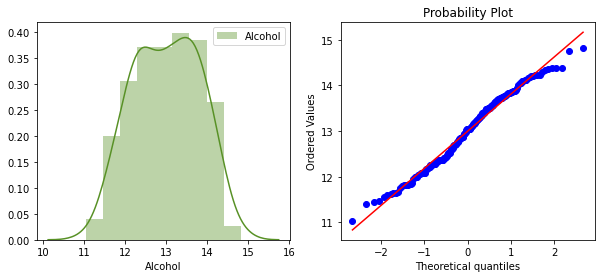

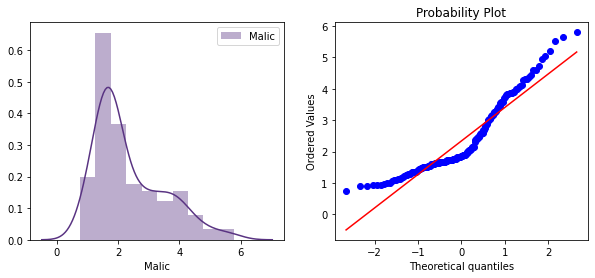

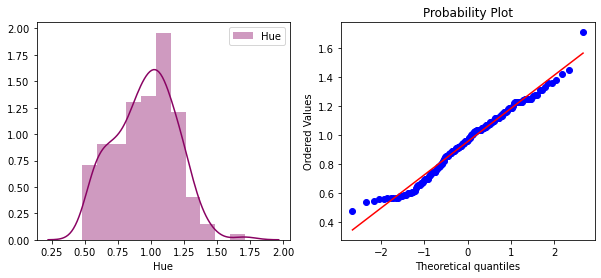

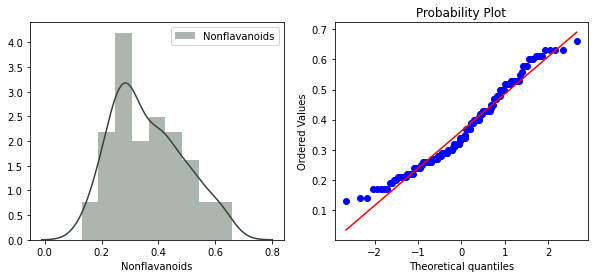

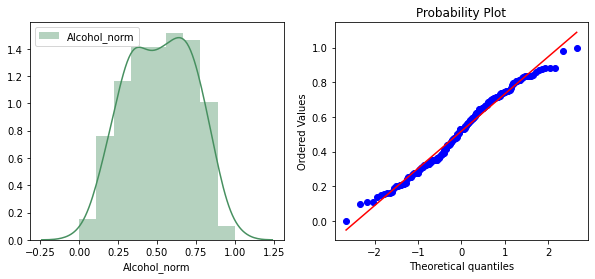

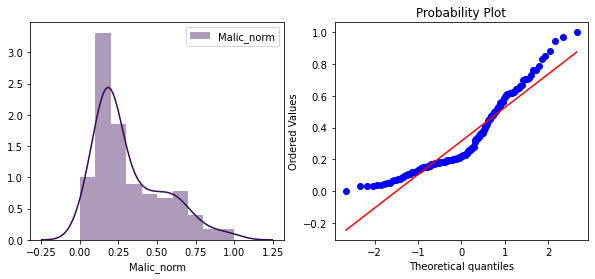

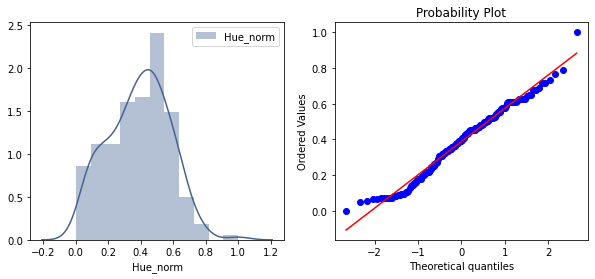

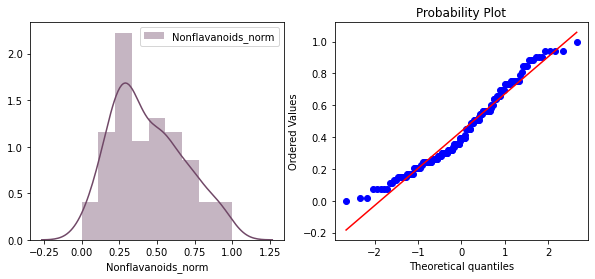

In [33]:
for i in df.columns:
    plot_for_norm(df,i)

In [55]:
## In some case after this transformation, scaling is needed. 
## In other cases scaling only needed. Based on the variable and the algorithm, transformation is made

# Standardization

In [34]:
df = data.copy()

In [35]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [36]:
df = df[['Ash', 'Magnesium', 'Flavanoids', 'Color']]

In [37]:
df

,Ash,Magnesium,Flavanoids,Color
0,2.43,127,3.06,5.64
1,2.14,100,2.76,4.38
2,2.67,101,3.24,5.68
3,2.50,113,3.49,7.80
4,2.87,118,2.69,4.32
...,...,...,...,...
173,2.45,95,0.61,7.70
174,2.48,102,0.75,7.30
175,2.26,120,0.69,10.20
176,2.37,120,0.68,9.30


In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
def stan(df,var):
    df.loc[: , var + "_scale"] = scaler.fit_transform(df[[var]])


In [41]:
for i in df.columns:
    stan(df,i)

In [42]:
def plot(df,var):
    plt.plot(figsize = (10,4))
    
    val = np.random.randint(100000,999999)
    col = "#" + str(val)
    plt.subplot(1,2,1)
    sns.distplot(df[var], color = col, label = var)
    plt.legend()
    plt.subplot(1,2,2)
    stats.probplot(df[var], dist = "norm", plot = plt)
    plt.show()    

    

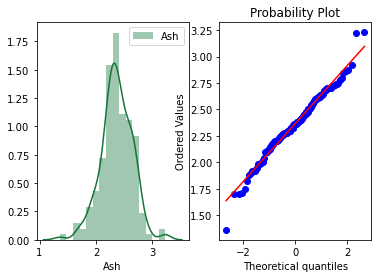

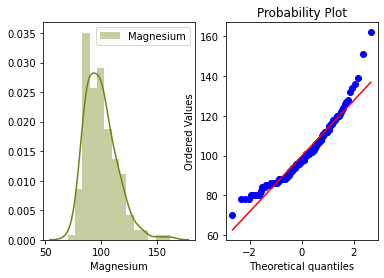

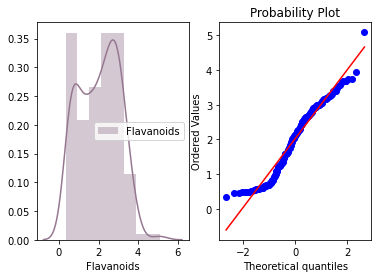

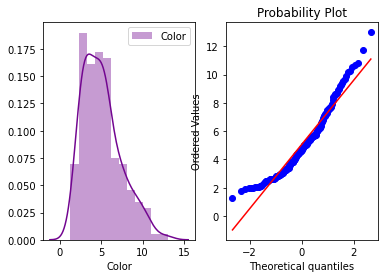

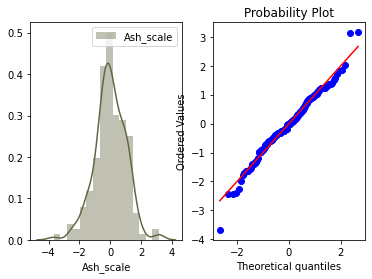

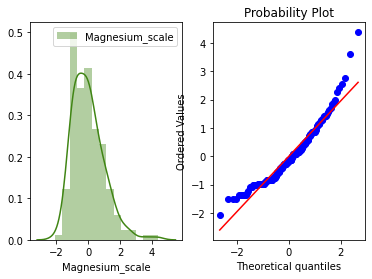

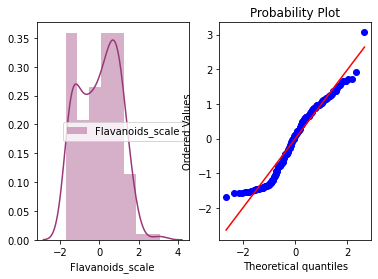

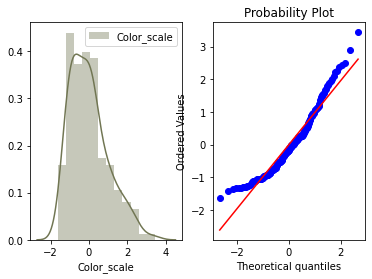

In [43]:
for i in df.columns:
    plot(df,i)

In [44]:
df

,Ash,Magnesium,Flavanoids,Color,Ash_scale,Magnesium_scale,Flavanoids_scale,Color_scale
0,2.43,127,3.06,5.64,0.232053,1.913905,1.034819,0.251717
1,2.14,100,2.76,4.38,-0.827996,0.018145,0.733629,-0.293321
2,2.67,101,3.24,5.68,1.109334,0.088358,1.215533,0.269020
3,2.50,113,3.49,7.80,0.487926,0.930918,1.466525,1.186068
4,2.87,118,2.69,4.32,1.840403,1.281985,0.663351,-0.319276
...,...,...,...,...,...,...,...,...
173,2.45,95,0.61,7.70,0.305159,-0.332922,-1.424900,1.142811
174,2.48,102,0.75,7.30,0.414820,0.158572,-1.284344,0.969783
175,2.26,120,0.69,10.20,-0.389355,1.422412,-1.344582,2.224236
176,2.37,120,0.68,9.30,0.012732,1.422412,-1.354622,1.834923


# Scaling to Median and Quantiles (Robust Scaling)

In [45]:
df = data.copy()

In [46]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [47]:
df = df[['Alcohol', 'Phenols', 'Flavanoids']]

In [48]:
from sklearn.preprocessing import RobustScaler

In [49]:
scaler = RobustScaler()

In [50]:
def robust(df,var):
    df[var + "_Median_quantile"] = scaler.fit_transform(df[[var]])

In [51]:
for i in df.columns:
    robust(df,i)

In [52]:
df

,Alcohol,Phenols,Flavanoids,Alcohol_Median_quantile,Phenols_Median_quantile,Flavanoids_Median_quantile
0,14.23,2.80,3.06,0.897338,0.420804,0.553892
1,13.20,2.65,2.76,0.114068,0.278960,0.374251
2,13.16,2.80,3.24,0.083650,0.420804,0.661677
3,14.37,3.85,3.49,1.003802,1.413712,0.811377
4,13.24,2.80,2.69,0.144487,0.420804,0.332335
...,...,...,...,...,...,...
173,13.71,1.68,0.61,0.501901,-0.638298,-0.913174
174,13.40,1.80,0.75,0.266160,-0.524823,-0.829341
175,13.27,1.59,0.69,0.167300,-0.723404,-0.865269
176,13.17,1.65,0.68,0.091255,-0.666667,-0.871257


In [53]:
def plot(df,var):
    plt.plot(figsize = (10,4))
    
    val = np.random.randint(100000,999999)
    col = "#" + str(val)
    plt.subplot(1,2,1)
    sns.distplot(df[var], color = col, label = var)
    plt.legend()
    plt.subplot(1,2,2)
    stats.probplot(df[var], dist = "norm", plot = plt)
    plt.show()    

    

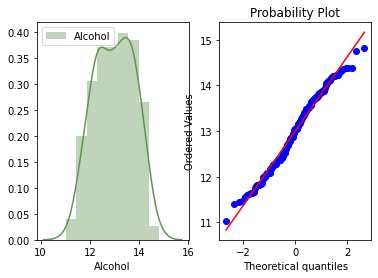

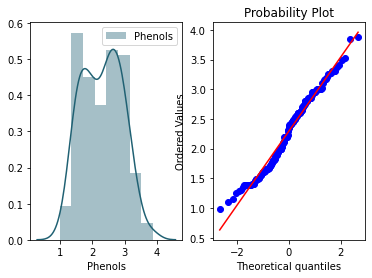

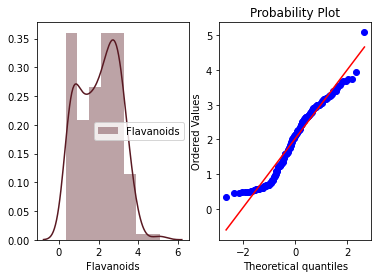

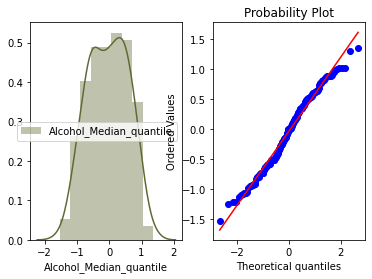

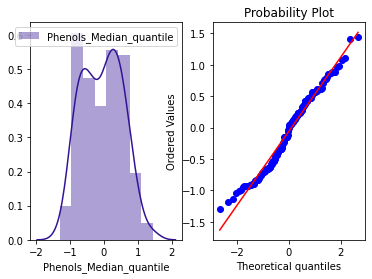

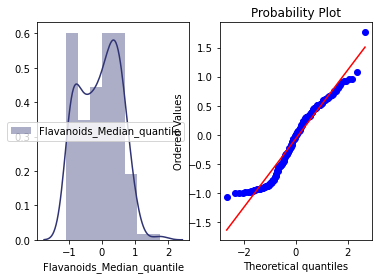

In [54]:
for i in df.columns:
    plot(df,i)